In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('laptop_dataset.csv')
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [3]:
df.drop('Unnamed: 0' , axis =1 , inplace = True)

In [4]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [5]:
df.duplicated().sum()

29

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# Handling Company Feature

In [9]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [10]:
company_counts = df['Company'].value_counts()

In [11]:
company_counts

Company
Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [12]:
companies_to_replace = company_counts[company_counts<=10].index

In [13]:
for i in df['Company']:
    if i in companies_to_replace : 
        df['Company'].replace(i,'Other' , inplace = True)

df['Company'].value_counts()

Company
Dell       291
Lenovo     289
HP         268
Asus       151
Acer       101
MSI         54
Other       51
Toshiba     48
Apple       21
Name: count, dtype: int64

<Axes: xlabel='Company', ylabel='Price'>

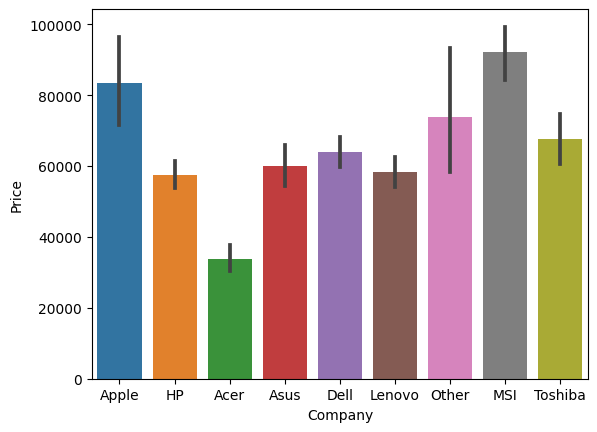

In [14]:
sns.barplot(x='Company', y='Price', data=df)

# Handling TypeName Feature

In [15]:
df['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

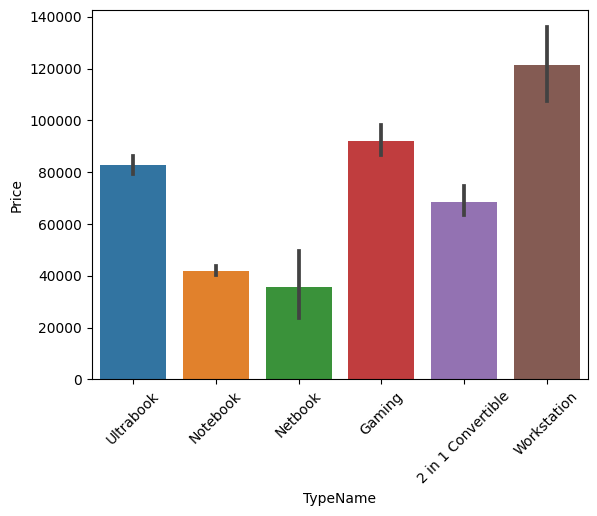

In [16]:
sns.barplot(x='TypeName' , y='Price' , data=df)
plt.xticks(rotation=45)
plt.show()

# Inches Feature

<Axes: xlabel='Inches', ylabel='Price'>

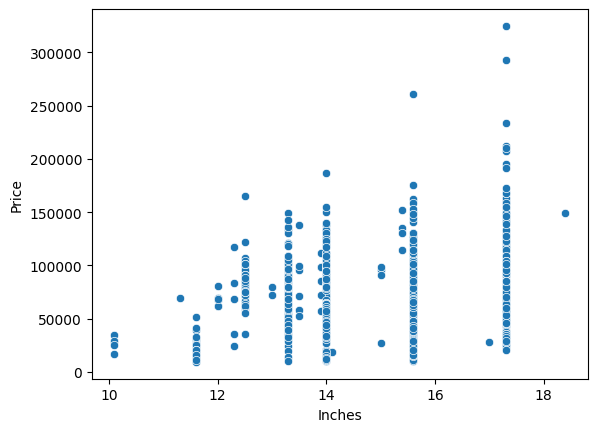

In [17]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

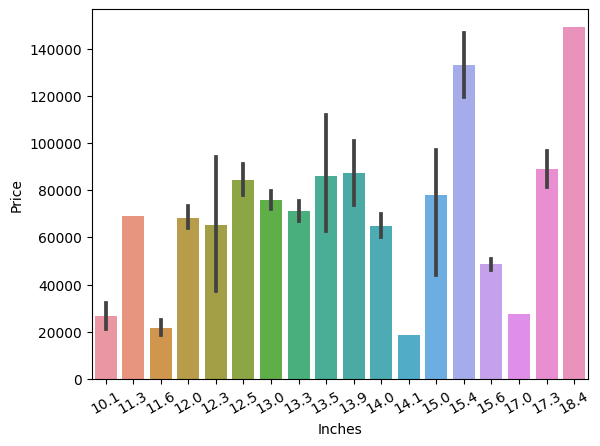

In [18]:
sns.barplot(x=df['Inches'],y=df['Price'])
plt.xticks(rotation=30)
plt.show()

# Screen Resolution Feature

In [19]:
df['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [20]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

<Axes: xlabel='Touchscreen', ylabel='Price'>

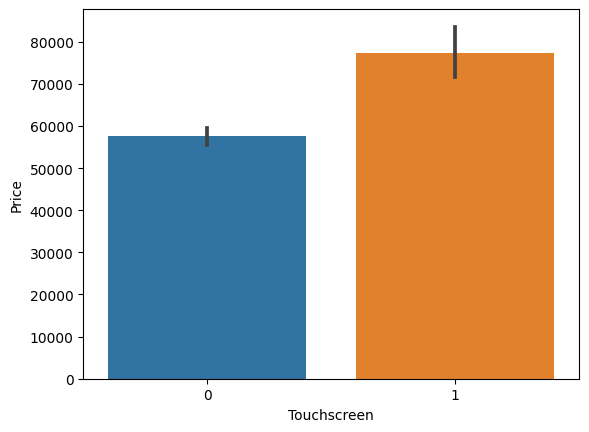

In [21]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [22]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

<Axes: xlabel='Ips', ylabel='Price'>

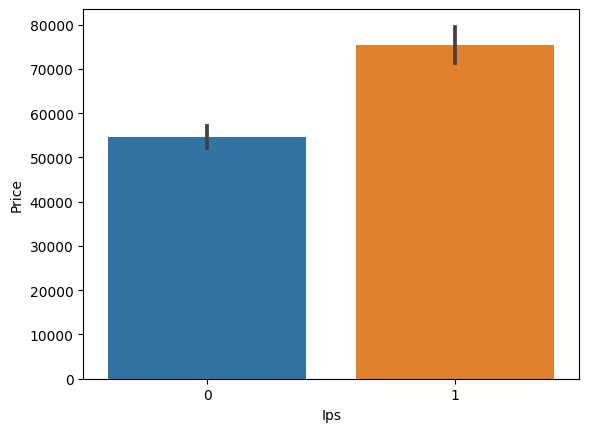

In [23]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [24]:
resolution = df['ScreenResolution'].str.extract(r'(\d+)x(\d+)', expand=True)

In [25]:
df['X_res'] = resolution[0].astype(int)
df['Y_res'] = resolution[1].astype(int)

In [26]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [27]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [28]:
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [29]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.983005


# Handling CPU Feature

In [30]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [31]:
def cpu(x):
    if 'Intel Core i5' in x or 'Intel Core i3' in x or "Intel Core i7" in x:
        return x[0:13]
    elif "Intel" in x:
        return "Other Intel Processor"
    elif "AMD" in x:
        return "AMD"
    else:
        return "Other"

In [32]:
df['Cpu'] = df.Cpu.apply(cpu)

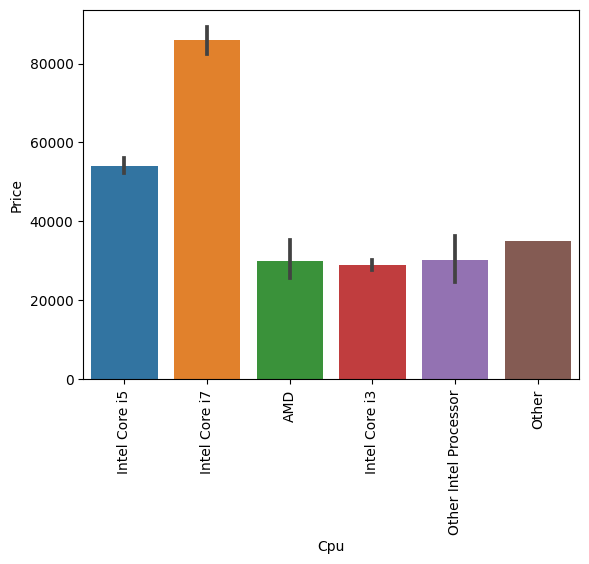

In [33]:
sns.barplot(x=df['Cpu'] , y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

# Handling Ram Feature

<Axes: xlabel='Ram', ylabel='Price'>

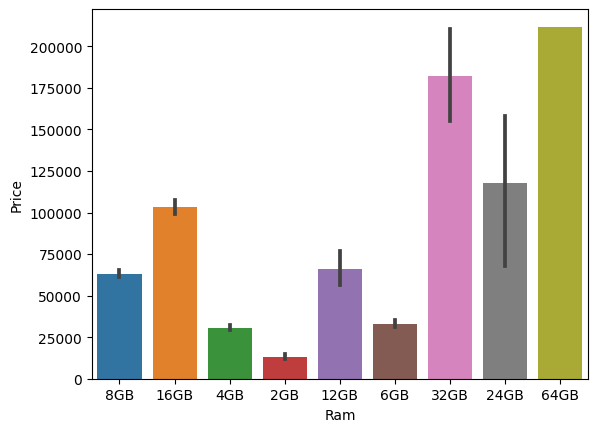

In [34]:
sns.barplot(x=df['Ram'] , y=df['Price'])

In [35]:
df['Ram']=df['Ram'].str.replace('GB','').astype(int)

# Handling Memory Feature

In [36]:
def ssd(x):
    if "SSD" in x and "+" not in x:
        return x.split(" ")[0].replace("TB" , "000GB").replace("GB","")
    elif "+" in x and "SSD" in x:
        a = x.split("+")
        if "SSD" in a[0]:
            return a[0].split(" ")[0].replace("TB" , "000GB").replace("GB","")
        elif  "SSD" in a[1]:
            return a[1].split(" ")[2].replace("TB" , "000GB").replace("GB","")
    else:
        return 0
def hdd(x):
    if "HDD" in x and "+" not in x:
        return x.split(" ")[0].replace("TB" , "000GB").replace("GB","")
    elif "+" in x and "HDD" in x:
        a = x.split("+")
        if "HDD" in a[0]:
            return a[0].split(" ")[0].replace("TB" , "000GB").replace("GB","")
        elif  "HDD" in a[1]:
            return a[1].split(" ")[2].replace("TB" , "000GB").replace("GB","")
    else:
        return 0
def hybrid(x):
    if "Hybrid" in x and "+" not in x:
        return x.split(" ")[0].replace("TB" , "000GB").replace("GB","")
    elif "+" in x and "Hybrid" in x:
        a = x.split("+")
        if "Hybrid" in a[0]:
            return a[0].split(" ")[0].replace("TB" , "000GB").replace("GB","")
        elif  "Hybrid" in a[1]:
            return a[1].split(" ")[2].replace("TB" , "000GB").replace("GB","")
    else:
        return 0
def flash(x):
    if "Flash Storage" in x and "+" not in x:
        return x.split(" ")[0].replace("TB" , "000GB").replace("GB","")
    elif "+" in x and "Flash Storage" in x:
        a = x.split("+")
        if "Flash Storage" in a[0]:
            return a[0].split(" ")[0].replace("TB" , "000GB").replace("GB","")
        elif  "Flash Storage" in a[1]:
            return a[1].split(" ")[2].replace("TB" , "000GB").replace("GB","")
    else:
        return 0


In [37]:
df['SSD'] = df.Memory.apply(ssd)
df['HDD'] = df.Memory.apply(hdd)
df['Hybrid'] = df.Memory.apply(hybrid)
df['Flash'] = df.Memory.apply(flash)

In [38]:
df.drop(columns=['Memory'],inplace=True)

# Handling GPU Feature

In [39]:
df.Gpu.unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [40]:
df['GPU Brand'] = df['Gpu'].str.split(" ").apply(lambda x : x[0])

In [41]:
df['GPU Brand'].value_counts()

GPU Brand
Intel     703
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

In [42]:
df = df[df['GPU Brand'] != 'ARM']


<Axes: xlabel='GPU Brand', ylabel='Price'>

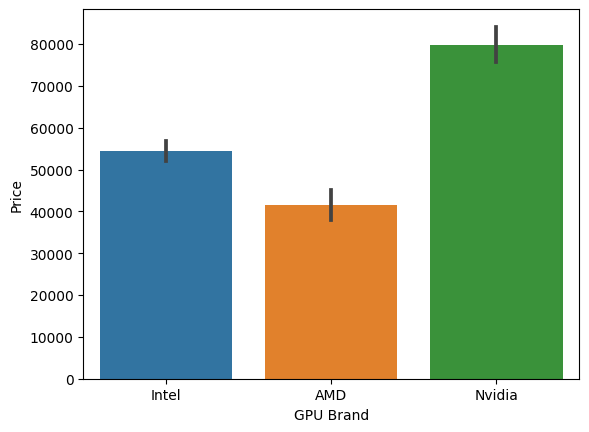

In [43]:
sns.barplot(x=df['GPU Brand'] , y =df['Price'])

In [44]:
df.drop(['Gpu'] , axis=1 , inplace=True)

C:\Users\vedan\AppData\Local\Temp\ipykernel_17680\4269870662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Gpu'] , axis=1 , inplace=True)


In [45]:
df.head()

,Company,TypeName,Cpu,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,SSD,HDD,Hybrid,Flash,GPU Brand
0,Apple,Ultrabook,Intel Core i5,8,macOS,1.37kg,71378.6832,0,1,226.983005,128,0,0,0,Intel
1,Apple,Ultrabook,Intel Core i5,8,macOS,1.34kg,47895.5232,0,0,127.677940,0,0,0,128,Intel
2,HP,Notebook,Intel Core i5,8,No OS,1.86kg,30636.0000,0,0,141.211998,256,0,0,0,Intel
3,Apple,Ultrabook,Intel Core i7,16,macOS,1.83kg,135195.3360,0,1,220.534624,512,0,0,0,AMD
4,Apple,Ultrabook,Intel Core i5,8,macOS,1.37kg,96095.8080,0,1,226.983005,256,0,0,0,Intel


# Handling OS

In [46]:
df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

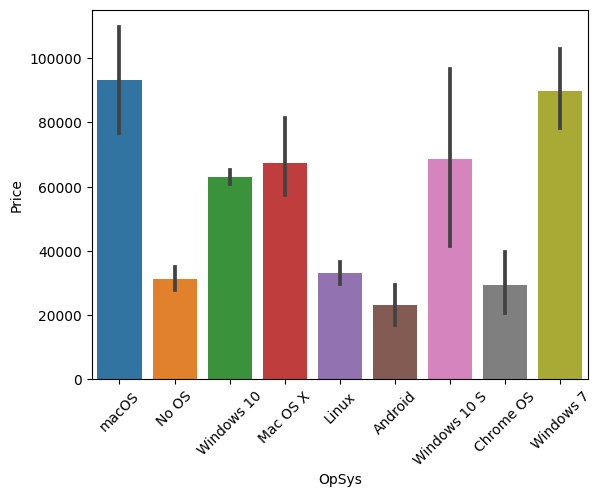

In [47]:
sns.barplot(x=df['OpSys'] , y=df['Price'])
plt.xticks(rotation = 45)
plt.show()

In [48]:
def os(x):
    if x == 'Windows 10' or x == 'Windows 7' or x == 'Windows 10 S':
        return 'Windows'
    elif x == 'macOS' or x == 'Mac OS X':
        return 'Mac'
    elif x== 'Linux':
        return 'Linux'
    else : 
        return 'Other'

In [49]:
df['OpSys']= df['OpSys'].apply(lambda x : os(x))

C:\Users\vedan\AppData\Local\Temp\ipykernel_17680\142846014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OpSys']= df['OpSys'].apply(lambda x : os(x))


<Axes: xlabel='OpSys', ylabel='Price'>

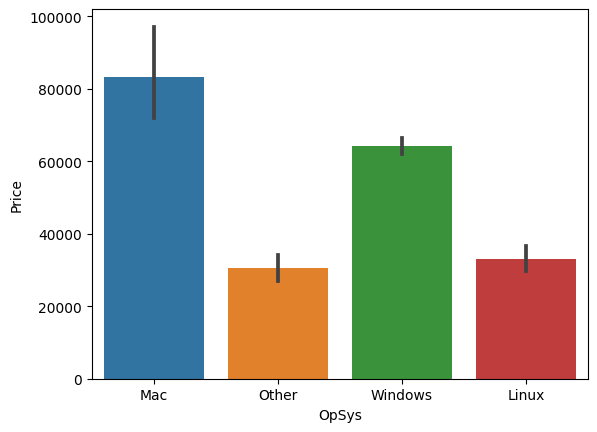

In [50]:
sns.barplot(x=df['OpSys'] , y=df['Price'])

# Handling Weight Feature

In [51]:
df['Weight'] = df['Weight'].str.replace('kg','').astype(float)

C:\Users\vedan\AppData\Local\Temp\ipykernel_17680\3989937749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weight'] = df['Weight'].str.replace('kg','').astype(float)


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1273 non-null   object 
 1   TypeName     1273 non-null   object 
 2   Cpu          1273 non-null   object 
 3   Ram          1273 non-null   int32  
 4   OpSys        1273 non-null   object 
 5   Weight       1273 non-null   float64
 6   Price        1273 non-null   float64
 7   Touchscreen  1273 non-null   int64  
 8   Ips          1273 non-null   int64  
 9   ppi          1273 non-null   float64
 10  SSD          1273 non-null   object 
 11  HDD          1273 non-null   object 
 12  Hybrid       1273 non-null   object 
 13  Flash        1273 non-null   object 
 14  GPU Brand    1273 non-null   object 
dtypes: float64(3), int32(1), int64(2), object(9)
memory usage: 154.2+ KB


In [53]:
df.head(1)

,Company,TypeName,Cpu,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,SSD,HDD,Hybrid,Flash,GPU Brand
0,Apple,Ultrabook,Intel Core i5,8,Mac,1.37,71378.6832,0,1,226.983005,128,0,0,0,Intel


In [54]:
df.drop(columns=['Hybrid' , 'Flash'] , inplace=True)

C:\Users\vedan\AppData\Local\Temp\ipykernel_17680\3866395374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Hybrid' , 'Flash'] , inplace=True)


In [55]:
df.head(1)

,Company,TypeName,Cpu,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,SSD,HDD,GPU Brand
0,Apple,Ultrabook,Intel Core i5,8,Mac,1.37,71378.6832,0,1,226.983005,128,0,Intel


# Train Test Split

In [56]:
x = df.drop('Price' , axis =1 )
y = np.log(df.Price)

In [57]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.20,random_state=42)

# Model Training

In [58]:
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.metrics import r2_score,mean_absolute_error

In [59]:
# from sklearn.linear_model import LinearRegression,Ridge,Lasso
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
# from sklearn.svm import SVR
# from xgboost import XGBRegressor

### Linear regression

In [60]:
df.head(1)

,Company,TypeName,Cpu,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,SSD,HDD,GPU Brand
0,Apple,Ultrabook,Intel Core i5,8,Mac,1.37,71378.6832,0,1,226.983005,128,0,Intel


In [61]:
# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,11])
# ],remainder='passthrough')

# step2 = LinearRegression()

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(x_train,y_train)

# y_pred = pipe.predict(x_test)

# print('R2 score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

In [62]:
# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,11])
# ],remainder='passthrough')

# step2 = Ridge(alpha=10)

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(x_train,y_train)

# y_pred = pipe.predict(x_test)

# print('R2 score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

# Decision Tree

In [63]:
# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,11])
# ],remainder='passthrough')

# step2 = DecisionTreeRegressor(max_depth=8)

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(x_train,y_train)

# y_pred = pipe.predict(x_test)

# print('R2 score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

# Random Forest

In [64]:
# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,11])
# ],remainder='passthrough')

# step2 = RandomForestRegressor(n_estimators=100,
#                               random_state=3,
#                               max_samples=0.5,
#                               max_features=0.75,
#                               max_depth=15)

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(x_train,y_train)

# y_pred = pipe.predict(x_test)

# print('R2 score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

# Gradient Boost

In [65]:
# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,11])
# ],remainder='passthrough')

# step2 = GradientBoostingRegressor(n_estimators=500)

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(x_train,y_train)

# y_pred = pipe.predict(x_test)

# print('R2 score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

# XgBoost

In [66]:
# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,11])
# ],remainder='passthrough')

# step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(x_train,y_train)

# y_pred = pipe.predict(x_test)

# print('R2 score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

# Voting Regressor

In [67]:
# from sklearn.ensemble import VotingRegressor,StackingRegressor

# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,2,4,11])
# ],remainder='passthrough')


# rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15 ,bootstrap=True)
# gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
# xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
# et = ExtraTreesRegressor(n_estimators=100,random_state=3,bootstrap=True,max_samples=0.5,max_features=0.75,max_depth=10)

# step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(x_train,y_train)

# y_pred = pipe.predict(x_test)

# print('R2 score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression , Ridge 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor , VotingRegressor , GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score

In [69]:
a = OneHotEncoder()
a.fit(x[['Company','TypeName','Cpu','OpSys','GPU Brand']])
cate = a.categories_

In [70]:
col1 = ColumnTransformer(transformers=[('encode' , OneHotEncoder(drop = "first" , handle_unknown='ignore', categories=cate),
                                       [0,1,2,4,11])] , remainder = 'passthrough')

In [71]:
newtrain = col1.fit_transform(x_train)
newtest = col1.transform(x_test)

In [72]:
from sklearn.preprocessing import StandardScaler
col2 = ColumnTransformer(transformers=[('scale' , StandardScaler() , slice(0,30))])

In [73]:
newtrain = col2.fit_transform(newtrain)
newtest = col2.transform(newtest)

In [74]:
lr = LinearRegression().fit(newtrain , y_train)
ypred = lr.predict(newtest)
r2_score(y_test , ypred) ,np.mean(cross_val_score(lr , newtrain , y_train))

(0.826618051082594, 0.8040654494064295)

In [75]:
rf = RandomForestRegressor().fit(newtrain , y_train)
ypred = rf.predict(newtest)
r2_score(y_test , ypred) , np.mean(cross_val_score(rf , newtrain , y_train))

(0.8868323689242494, 0.8637625019722825)

In [76]:
gd = GradientBoostingRegressor(n_estimators=500 ,  min_samples_split=5 , min_samples_leaf=2 ).fit(newtrain , y_train)
ypred = gd.predict(newtest)
r2_score(y_test , ypred) , np.mean(cross_val_score(gd , newtrain , y_train))

(0.8875431500576896, 0.885460114668488)

In [77]:
xg = XGBRegressor(n_estimators = 100).fit(newtrain , y_train)
ypred = xg.predict(newtest)
r2_score(y_test , ypred) , np.mean(cross_val_score(xg , newtrain , y_train))

(0.8851910890319176, 0.8696907108086922)

In [79]:
import pickle
pickle.dump(gd , open('laptop.pkl','wb'))

In [80]:
x_train.head(1)

,Company,TypeName,Cpu,Ram,OpSys,Weight,Touchscreen,Ips,ppi,SSD,HDD,GPU Brand
490,Lenovo,Notebook,Intel Core i5,8,Windows,2.3,0,1,141.211998,256,0,Nvidia


In [82]:
# model = pickle.load(open('laptop.pkl','rb'))
# model.predict(np.array([["Lenovo","Notebook","Intel Core i5",8,"Windows",2.3,0,1,141.211998,256,0,'Nvidia']]))

In [83]:
from sklearn.pipeline import Pipeline

In [85]:
pipe = Pipeline(
    [('step1' , col1) , ('step2' , col2) , ('step3' , gd)])

pipe.fit(x_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode',
                                                  OneHotEncoder(categories=[array(['Acer', 'Apple', 'Asus', 'Dell', 'HP', 'Lenovo', 'MSI', 'Other',
       'Toshiba'], dtype=object),
                                                                            array(['2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook', 'Ultrabook',
       'Workstation'], dtype=object),
                                                                            array(['AMD', 'Intel Core i3', 'Intel Core i5', 'Intel C...
       'Other Intel Processor'], dtype=object),
                                                                            array(['Linux', 'Mac', 'Other', 'Windows'], dtype=object),
                                                                            array(['AMD', 'Intel', 'Nvidia'], dtype=object)],
                                                                drop='first',
                                                                handle_unknown='ignore'),
                                                  [0, 1, 2, 4, 11])])),
                ('step2',
                 ColumnTransformer(transformers=[('scale', StandardScaler(),
                                                  slice(0, 30, None))])),
                ('step3',
                 GradientBoostingRegressor(min_samples_leaf=2,
                                           min_samples_split=5,
                                           n_estimators=500))])

In [86]:
y_pred = pipe.predict(x_test)
print('R2 score',r2_score(y_test,y_pred))

R2 score 0.8880115007276685


In [87]:
import pickle
pickle.dump(gd , open('pipe.pkl','wb'))

In [88]:
model = pickle.load(open('pipe.pkl','rb'))
model.predict(np.array([["Lenovo","Notebook","Intel Core i5",8,"Windows",2.3,0,1,141.211998,256,0,'Nvidia']]))

ValueError: could not convert string to float: 'Lenovo'

In [90]:
pipe.predict(np.array([["Lenovo","Notebook","Intel Core i5",8,"Windows",2.3,0,1,141.211998,256,0,'Nvidia']]))

C:\Users\vedan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([10.88766894])